In [1]:
import torch
import sklearn
import matplotlib.pyplot as plt
import sympy
import scipy

### Norms
using Norm we can measure the size of a vector

#### L1 Norm
Sum of absolute values of the vector elements

In [2]:
# simple, using torch
torch.norm(torch.arange(1, 5, dtype=torch.float32), p=1)

tensor(10.)

In [3]:
def l_1_norm(vec):
    return torch.sum(torch.absolute(vec))

In [4]:
l_1_norm(torch.arange(1, 5))

tensor(10)

#### L2 Norm
L2 norm, with p = 2, is known as the Euclidean norm

In [5]:
def l_p_norm(vec, p=2):
    return torch.pow(torch.pow(vec, p).sum(), 1/p)

In [6]:
vec = torch.tensor([1, 2, 3, 4])
l_p_norm(vec)

tensor(5.4772)

In [7]:
torch.norm(vec.float(), p=2)

tensor(5.4772)

#### Max Norm
absolute value of the element with the largest magnitude in the vector

In [8]:
def max_norm(vec):
    return torch.max(torch.absolute(vec))

In [9]:
max_norm(torch.tensor([1, 2, 3, -4]))

tensor(4)

In [10]:
def frobenius_norm(mat):
    return l_p_norm(mat, p=2)

In [11]:
c = torch.arange(1, 7).view(2, 3)

In [12]:
frobenius_norm(c)

tensor(9.5394)

In [13]:
torch.norm(c.float(), p='fro')

tensor(9.5394)

In [19]:
# used to measure how similar two vectors are in an inner product space.
def cos_similarity(x, y):
    return torch.dot(x, y)/(l_p_norm(x) * l_p_norm(y, 2))

In [20]:
x = torch.tensor([1,2,3,-4])
y = torch.tensor([1,2,3,-4])
cos_similarity(x, y)

tensor(1.0000)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(torch.tensor([1,2,3,-4]).reshape(1, -1), torch.tensor([1,2,3,-4]).reshape(1, -1))

array([[1.]])

#### Eigendecomposition

In [31]:
import matplotlib.pyplot as plt

def plot_2d_vecs(vecs, title=None, colors=None, scale_=20):
    origin = [0, 0], [0, 0] 

    plt.quiver(*origin, *[vecs[:,i] for i in range(vecs.shape[1])], color=colors, scale=scale_)
    plt.title(title)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

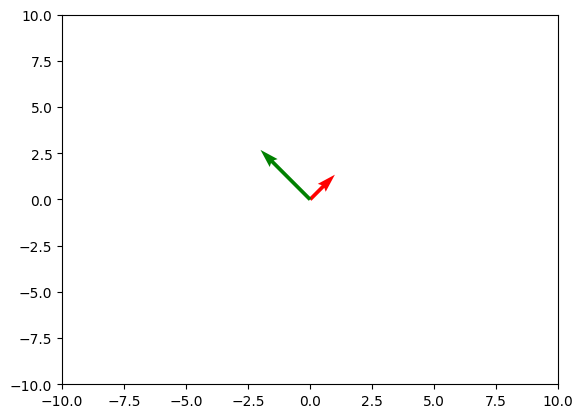

In [32]:
stacked_vecs = np.array([[1,1],[-2,2]])

plot_2d_vecs(stacked_vecs, colors=['r','g'])

In [33]:
A = (np.random.rand(2, 2)*5)
A

array([[1.43615542, 2.90885312],
       [4.55904535, 0.47624322]])

In [34]:
x = [2,3]

In [35]:
A@x

array([11.5988702 , 10.54682037])

In [36]:
np.stack([A@x, x]).T

array([[11.5988702 ,  2.        ],
       [10.54682037,  3.        ]])

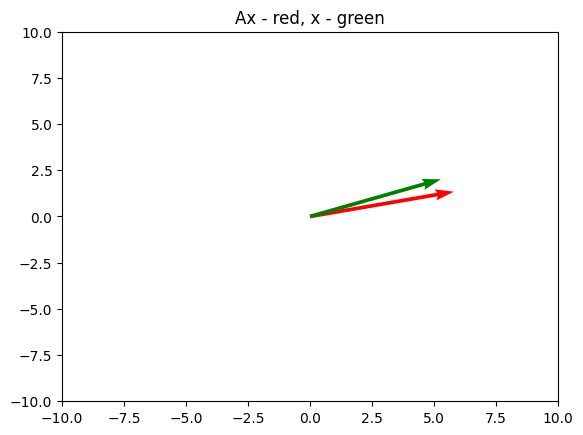

In [37]:
plot_2d_vecs(np.stack([A@x, x]).T, title='Ax - red, x - green', colors=['r','g'], scale_=40)

In [45]:
from numpy import linalg
w, v = linalg.eig(A)
w, v 

(array([ 4.62933846, -2.71693982]),
 array([[ 0.67342783, -0.57368555],
        [ 0.73925297,  0.81907563]]))

In [46]:
v[:,0]

array([0.67342783, 0.73925297])

In [47]:
A@v[:,0]

array([3.11752535, 3.42225223])

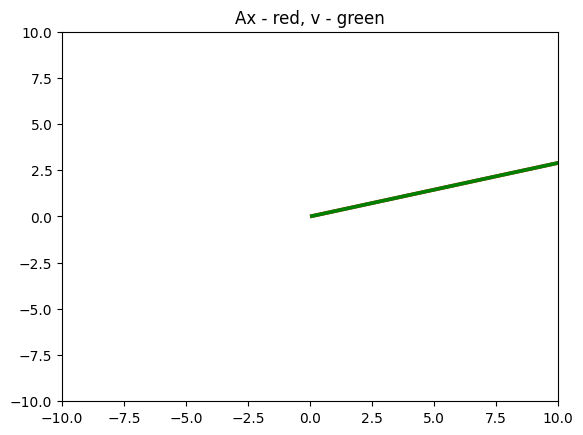

In [48]:
# As we can see the Av only scales the eigenvector v, but doesn't rotate
plot_2d_vecs(np.stack([A@(v[:,0]), v[:,0]]).T, title='Ax - red, v - green', colors=['r','g'], scale_=5)

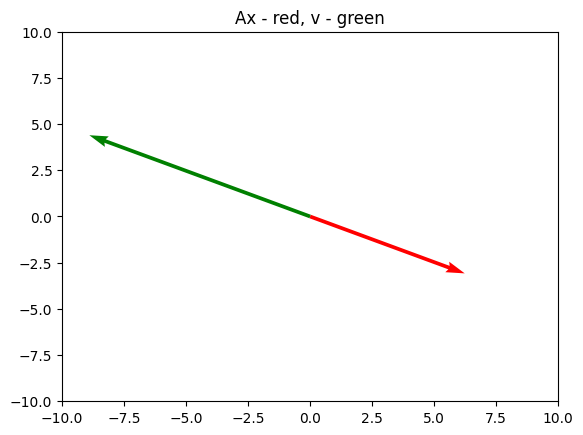

In [49]:
# As we can see the Av only scales the eigenvector v, but doesn't rotate
plot_2d_vecs(np.stack([A@(v[:,1]), v[:,1]]).T, title='Ax - red, v - green', colors=['r','g'], scale_=5)

In [50]:
eigvals, eigvecs = linalg.eig(A)
lambda_mat = np.diag(eigvals)
eigvecs @ lambda_mat @ np.linalg.inv(eigvecs)

array([[1.43615542, 2.90885312],
       [4.55904535, 0.47624322]])

In [51]:
A

array([[1.43615542, 2.90885312],
       [4.55904535, 0.47624322]])

Ax = lx                                                                                                                   
(A - lI)x = 0                                                                                                            
det(A - lI) = 0

In [56]:
import sympy 
from sympy import *

def find_eigenvals(mat):
    assert mat.shape[0] == mat.shape[1]

    l = sympy.symbols('lamda')

    M = np.copy(mat) - sympy.diag(*([l]*mat.shape[0]))
    det_polynom = M.det()
    
    eigenvals = solve(det_polynom)
    
    if (mat == mat.T).all() or np.array([np.abs(im(e)) for e in eigenvals]).sum()/len(eigvals) < 0.1:
        return np.array([re(e) for e in eigenvals])
    return eigenvals

In [64]:
eigenvals = find_eigenvals(A)
eigenvals

array([-2.71693982378023, 4.62933846121698], dtype=object)

In [65]:
np.linalg.eigvals(A)

array([ 4.62933846, -2.71693982])

In [66]:
S = np.array([[2,1],[1,2]])

In [67]:
eig_vals_S = find_eigenvals(S)

In [68]:
eig_vals_S

array([1, 3], dtype=object)

In [69]:
np.linalg.eigvals(S)

array([3., 1.])

In [72]:
# Two checks: 
# 1. sum of eigvals must be equal to the trace
# 2. product of eigvals must be equal to the determinant

def check_eigvals(mat, eigvals):
    valid = True
    if np.trace(mat) == np.sum(eigvals):
        print('First check passed: The sum of eigvals is equal to the trace of the matrix.', np.trace(mat))
    else:
        valid = False
        print('First check didn\'t pass: The sum of eigvals is not equal to the trace of the matrix.', np.trace(mat), np.sum(eig_vals_S))
    if np.abs(np.linalg.det(mat) - np.prod(eigvals)) < 0.01:
        print('Second check passed: The product of eigvals is equal to the determinant of the matrix.', np.prod(eig_vals_S))
    else:
        valid = False
        print('Second check didn\'t pass: The product of eigvals is not equal to the determinant of the matrix.', np.prod(eig_vals_S), np.linalg.det(mat))
    if valid:
        print('Eigenvalues computed correctly')
    else:
        print('Wrong eigenvalues')

In [73]:
check_eigvals(S, eig_vals_S)

First check passed: The sum of eigvals is equal to the trace of the matrix. 4
Second check passed: The product of eigvals is equal to the determinant of the matrix. 3
Eigenvalues computed correctly


In [74]:
# an example where the eigvals are complex numbers
Q = np.array([[0,-1],[1,0]])
Q

array([[ 0, -1],
       [ 1,  0]])

In [75]:
find_eigenvals(Q)

[-I, I]

In [76]:
check_eigvals(Q, find_eigenvals(Q))

First check passed: The sum of eigvals is equal to the trace of the matrix. 0
Second check passed: The product of eigvals is equal to the determinant of the matrix. 3
Eigenvalues computed correctly


In [78]:
eig_vals_S, V_S = np.linalg.eig(S)
eig_vals_S, V_S

(array([3., 1.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [79]:
# identity
V_S@V_S.T

array([[1., 0.],
       [0., 1.]])

In [80]:
eig_vals_A, V_A = np.linalg.eig(A)
eig_vals_A, V_A

(array([ 4.62933846, -2.71693982]),
 array([[ 0.67342783, -0.57368555],
        [ 0.73925297,  0.81907563]]))

In [81]:
A

array([[1.43615542, 2.90885312],
       [4.55904535, 0.47624322]])

In [82]:
# not orthonormal columns in V_A
V_A@V_A.T

array([[0.78262015, 0.02794167],
       [0.02794167, 1.21737985]])

In [86]:
eig_vals_Q, V_Q = np.linalg.eig(Q)
eig_vals_Q, V_Q

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

In [87]:
V_Q@V_Q.T

array([[ 1.+0.00000000e+00j,  0.+2.23711432e-17j],
       [ 0.+2.23711432e-17j, -1.+0.00000000e+00j]])

In [88]:
# Similar Matrices have the same eigvals

A = (np.random.rand(3, 3)*5).round()
B = (np.random.rand(3, 3)*5).round()

sim_to_A = B@A@linalg.inv(B)

In [89]:
A

array([[3., 4., 5.],
       [5., 3., 4.],
       [3., 2., 1.]])

In [90]:
sim_to_A

array([[3.        , 2.23076923, 4.84615385],
       [7.        , 3.23076923, 8.84615385],
       [4.        , 0.84615385, 0.76923077]])

In [91]:
find_eigenvals(A)

array([-2.14396495044853, -0.840843347935600, 9.98480829838413],
      dtype=object)

In [92]:
find_eigenvals(sim_to_A)

array([-2.14396495044853, -0.840843347935600, 9.98480829838413],
      dtype=object)

In [93]:
# A@B  and B@A have the same nonzero eigvalues
find_eigenvals(A@B), find_eigenvals(B@A)

(array([-2.81518549760034, -1.04088063465107, 79.8560661322514],
       dtype=object),
 array([-2.81518549760034, -1.04088063465107, 79.8560661322514],
       dtype=object))